# У нас еще есть данные о коммитах. Разве не было бы круто нарисовать обе метрики во времени на одном графике? А что, если мы увидим какие-то закономерности?

In [1]:
import pandas as pd
import sqlite3


conn = sqlite3.connect('../data/checking-logs.sqlite')

In [2]:
# Запросы для получения данных

views_query = """
SELECT datetime
FROM pageviews
WHERE uid LIKE 'user_%';
"""
views_df = pd.read_sql_query(views_query, conn)

checks_query = """
SELECT timestamp
FROM checker
WHERE uid LIKE 'user_%';
"""
checks_df = pd.read_sql_query(checks_query, conn)

In [3]:
# Преобразование столбцов datetime и timestamp в формат datetime
views_df['datetime'] = pd.to_datetime(views_df['datetime'])
checks_df['timestamp'] = pd.to_datetime(checks_df['timestamp'])

# Извлечение даты из столбцов datetime и timestamp
views_df['date'] = views_df['datetime'].dt.date
checks_df['date'] = checks_df['timestamp'].dt.date

# Группировка данных по дате и подсчет просмотров и подтверждений
views_per_day = views_df.groupby('date').size().reset_index(name='views')
checks_per_day = checks_df.groupby('date').size().reset_index(name='commits')

# Объединение данных по дате
merged_df = pd.merge(views_per_day, checks_per_day, on='date', how='inner')

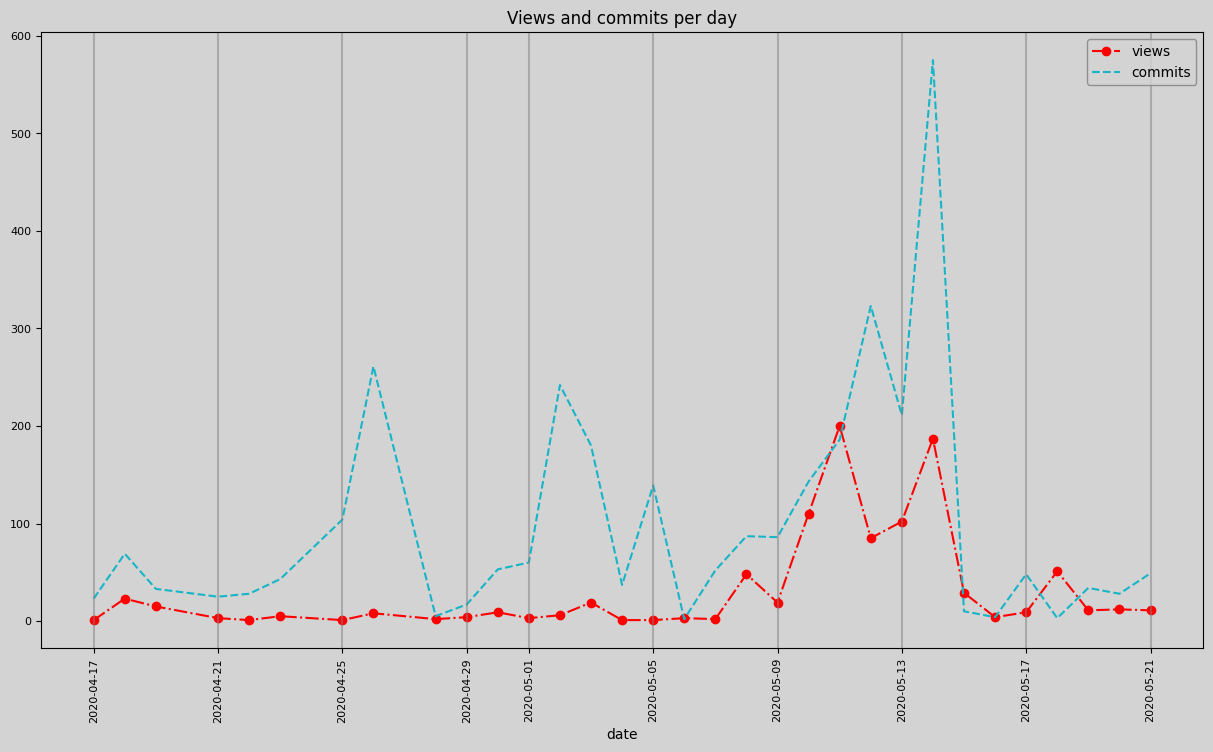

In [4]:
#Строим график
ax = merged_df.plot(
    x='date',
    y='views',
    kind='line',
    marker='o',
    color='red',
    linestyle='-.',
    figsize=(15, 8),
    title='Views and commits per day',
    fontsize=8
)
ax = merged_df.plot(
    x='date',
    y='commits',
    kind='line',
    color='#16b5c7',
    linestyle='--',
    ax=ax
)
ax.set_xlabel('date')
ax.figure.set_facecolor('lightgray')
ax.set_facecolor('lightgrey')
ax.xaxis.set_tick_params(rotation=90)
ax.yaxis.set_tick_params(labelsize=8)
ax.xaxis.set_tick_params(labelsize=8)

ax.legend(facecolor='lightgrey', edgecolor='grey')

specific_dates = [
    '2020-04-17', '2020-04-21', '2020-04-25', '2020-04-29', '2020-05-01', '2020-05-05', '2020-05-09', '2020-05-13', '2020-05-17', '2020-05-21'
]
for date in specific_dates:
    ax.axvline(x=pd.to_datetime(date), color='gray', alpha=0.5)

## «Сколько раз количество просмотров превышало 150?»

In [5]:
high_views_count = merged_df[merged_df['views'] > 150].shape[0]
print(f"Ответ: {high_views_count}")

Ответ: 2


In [6]:
conn.close()